In [1]:
# Clone main branch of FastChat
!git clone https://github.com/philschmid/FastChat.git
# Install FastChat with model worker and llm_judge dependencies
!pip install -e "./FastChat[model_worker,llm_judge]"
!pip install matplotlib tabulate


Cloning into 'FastChat'...
remote: Enumerating objects: 5847, done.
remote: Counting objects: 100% (2092/2092), done.
remote: Compressing objects: 100% (323/323), done.
remote: Total 5847 (delta 1949), reused 1815 (delta 1768), pack-reused 3755
Receiving objects: 100% (5847/5847), 31.86 MiB | 53.48 MiB/s, done.
Resolving deltas: 100% (4338/4338), done.
Obtaining file:///workspace/FastChat
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
%cd {os.getcwd()}/FastChat/fastchat/llm_judge
# should be in FastChat


/workspace/FastChat/fastchat/llm_judge


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
# make sure that is the correct path
model_path="cognitivecomputations/dolphin-2.1-mistral-7b"
# model id will be used to load our conversation template https://github.com/lm-sys/FastChat/blob/1db84d0906196673db361eac50d5aa65180a0ffe/fastchat/model/model_adapter.py#L1579
model_id="mistral-dolphin-sft"

# generate model answer
!python gen_model_answer.py --model-id {model_id} --model-path {model_path}

Output to data/mt_bench/model_answer/mistral-dolphin-sft.jsonl
tokenizer_config.json: 100%|███████████████| 1.69k/1.69k [00:00<00:00, 6.38MB/s]
tokenizer.model: 100%|████████████████████████| 493k/493k [00:00<00:00, 125MB/s]
added_tokens.json: 100%|██████████████████████| 51.0/51.0 [00:00<00:00, 204kB/s]
special_tokens_map.json: 100%|██████████████████| 100/100 [00:00<00:00, 412kB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
config.json: 100%|█████████████████████████████| 622/622 [00:00<00:00, 2.61MB/s]
pytorch_model.bin.index.json: 100%|████████| 23.9k/23.9k [00:00<00:00, 55.3MB/s]
pytorch_model-00001-of-00002.bin:   0%|             | 0.00/9.94G [00:00<?, ?B/s]
pytorch_model-00001-of-00002.bin:   0%|    | 10.5M/9.94G [00:00<01:57, 84.4MB/s]
pytorch_model-00001-of-00002.bin:   0%|    | 21.0M/9.94G [00:00<03:41, 44.8MB/s]
pytorch_model-00001-of-00002.bin:   0%|    | 31.5M/9.94G [00:00<03:35, 46.0MB/s]
pytorch_m

In [ ]:
# Change this to where you saved the model during training, remember our current directory is FastChat/
model_path="DrishtiSharma/doplhin-mistral-dpo-ultrafeedback-binarized-preferences-sigmoid"

# model id will be used to load our conversation template https://github.com/lm-sys/FastChat/blob/1db84d0906196673db361eac50d5aa65180a0ffe/fastchat/model/model_adapter.py#L1579
model_id="mistral-dolphin-dpo"

# generate model answer
!python gen_model_answer.py --model-id {model_id} --model-path {model_path}


Output to data/mt_bench/model_answer/mistral-dolphin-dpo.jsonl
tokenizer_config.json: 100%|███████████████| 1.70k/1.70k [00:00<00:00, 7.03MB/s]
tokenizer.model: 100%|████████████████████████| 493k/493k [00:00<00:00, 117MB/s]
tokenizer.json: 100%|██████████████████████| 1.80M/1.80M [00:00<00:00, 20.0MB/s]
added_tokens.json: 100%|██████████████████████| 51.0/51.0 [00:00<00:00, 244kB/s]
special_tokens_map.json: 100%|█████████████████| 445/445 [00:00<00:00, 2.15MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards:   0%|                          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tenso

In [8]:
open_ai_key="sk-xxx" # replace with your openai key

# Pairwise comparison of the two models using OpenAI's GPT-4 Turbo
!OPENAI_API_KEY={open_ai_key} python gen_judgment.py --model-list "mistral-dolphin-dpo" "mistral-dolphin-sft" --judge-model "gpt-4-1106-preview" --mode "pairwise-all"


Stats:
{
    "bench_name": "mt_bench",
    "mode": "pairwise-all",
    "judge": "gpt-4-1106-preview",
    "baseline": null,
    "model_list": [
        "mistral-dolphin-dpo",
        "mistral-dolphin-sft"
    ],
    "total_num_questions": 80,
    "total_num_matches": 160,
    "output_path": "data/mt_bench/model_judgment/gpt-4-1106-preview_pair.jsonl"
}
Evaluating the following models.
100%|███████████████████████████████████████| 160/160 [1:08:26<00:00, 25.67s/it]


In [12]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 148.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 76.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [13]:
import pandas as pd

In [14]:
# Results are saved at the following location, make sure its correct
res = "./data/mt_bench/model_judgment/gpt-4-1106-preview_pair.jsonl"

!python show_result.py --input-file {res} --model-list "mistral-dolphin-dpo" "mistral-dolphin-sft" --judge-model "gpt-4-1106-preview" --mode pairwise-all





Mode: pairwise-all
Input file: ./data/mt_bench/model_judgment/gpt-4-1106-preview_pair.jsonl
| model               |   win |   loss |   tie |   win_rate |   loss_rate |   win_rate_adjusted |
|:--------------------|------:|-------:|------:|-----------:|------------:|--------------------:|
| mistral-dolphin-sft |    39 |     19 |   144 |  0.193069  |   0.0940594 |            0.549505 |
| mistral-dolphin-dpo |    19 |     39 |   144 |  0.0940594 |   0.193069  |            0.450495 |


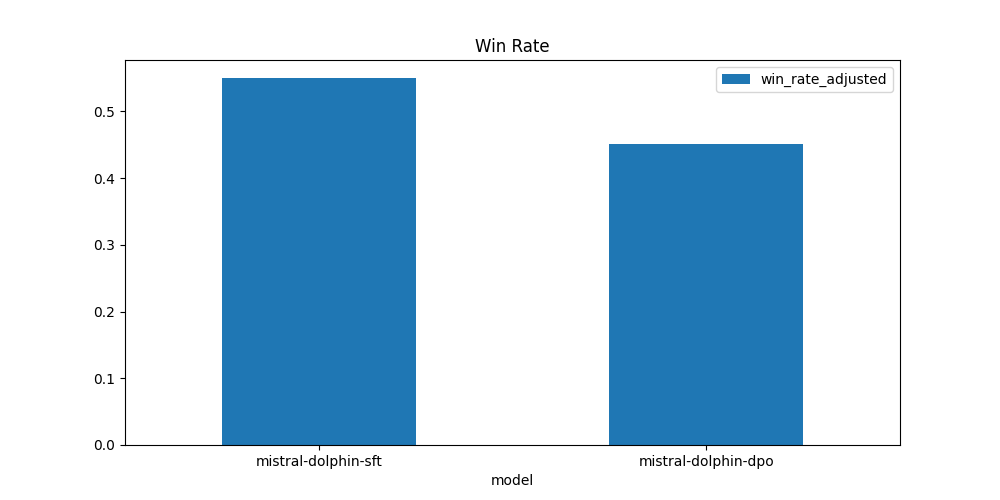

In [15]:
# display plot from image file
from PIL import Image
i = Image.open("win_rate_gpt-4-1106-preview.png")
i.show()